In [1]:

import pandas as pd

df = pd.read_csv('Titanic_Train.csv') 


In [2]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [9]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
df.shape

(891, 12)

Survival Rate: 38.38%


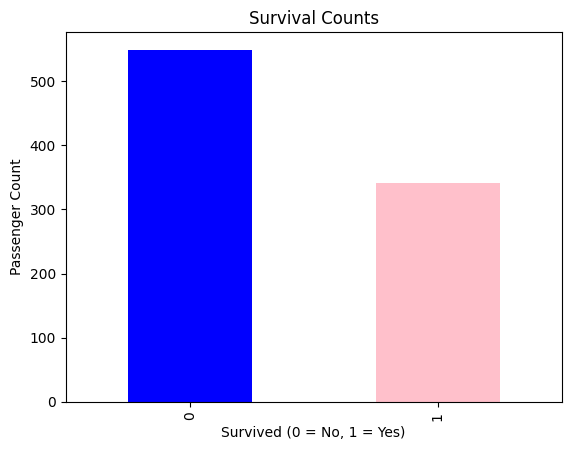

In [20]:
survival_rate = df['Survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")
df['Survived'].value_counts().plot(kind='bar', title='Survival Counts', color=['blue', 'pink'])
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()


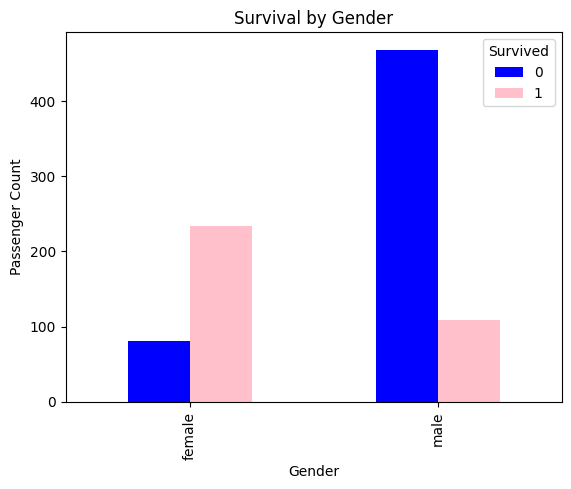

In [21]:
df.groupby(['Sex'])['Survived'].value_counts().unstack().plot(kind='bar', title='Survival by Gender', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.show()


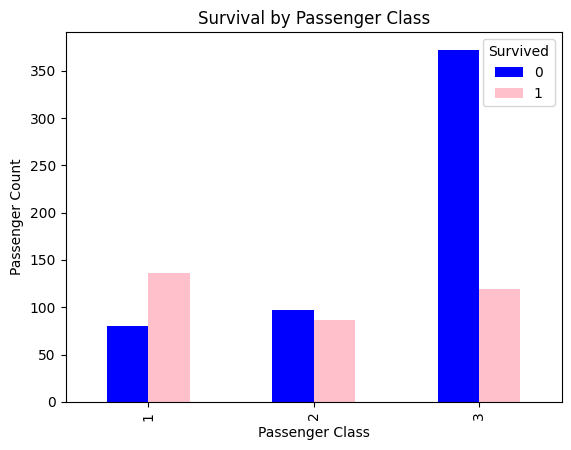

In [22]:
df.groupby(['Pclass'])['Survived'].value_counts().unstack().plot(kind='bar', title='Survival by Passenger Class', color=['blue', 'pink'])
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.show()


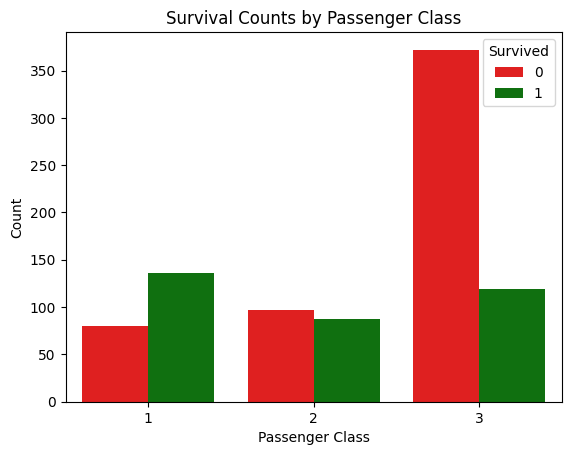

In [25]:

sns.countplot(x='Pclass', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


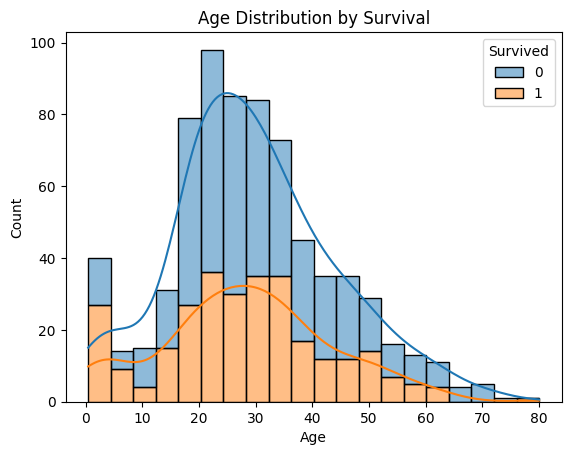

In [26]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


AgeGroup
Child      57.352941
Youth      48.888889
Adult      38.608696
Elderly    26.923077
Name: Survived, dtype: float64


/tmp/ipykernel_6860/3208097214.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean() * 100


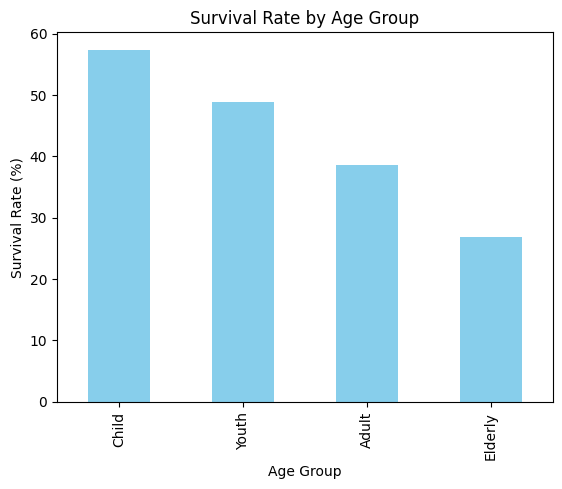

In [27]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Youth', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean() * 100
print(survival_by_agegroup)

survival_by_agegroup.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()


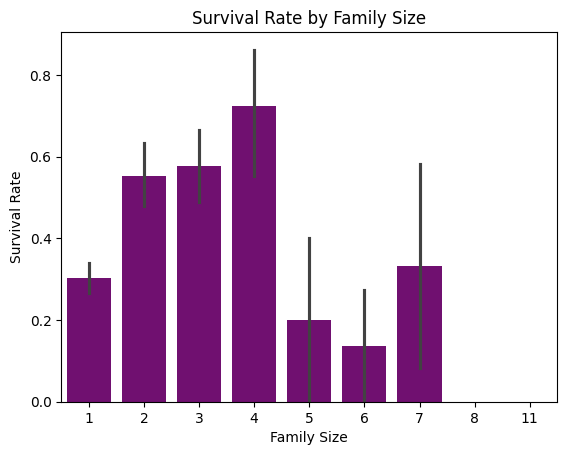

In [28]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include self

sns.barplot(x='FamilySize', y='Survived', data=df, color='purple')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


/tmp/ipykernel_6860/3987947151.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')


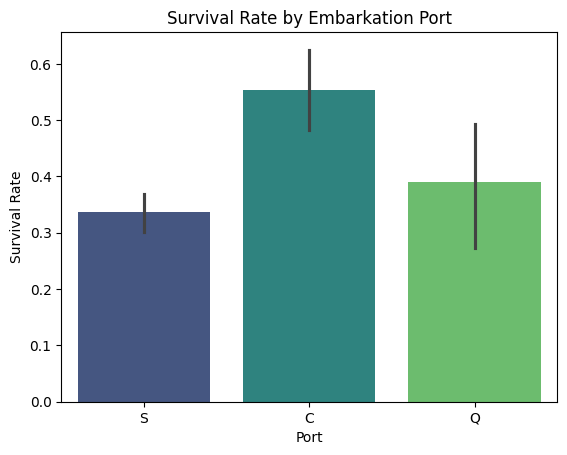

In [29]:
sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Port')
plt.ylabel('Survival Rate')
plt.show()


/tmp/ipykernel_6860/2604039816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette=['red', 'green'])


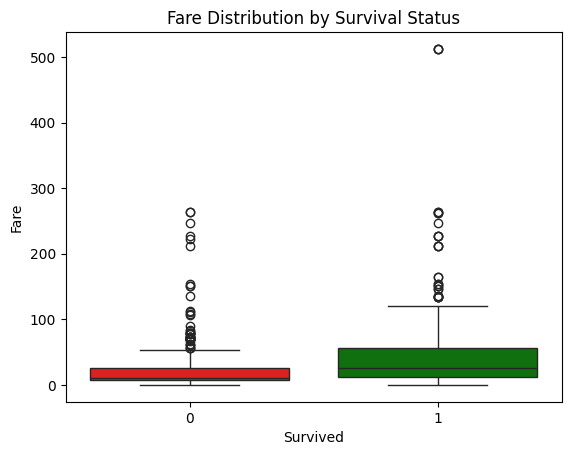

In [30]:
sns.boxplot(x='Survived', y='Fare', data=df, palette=['red', 'green'])
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


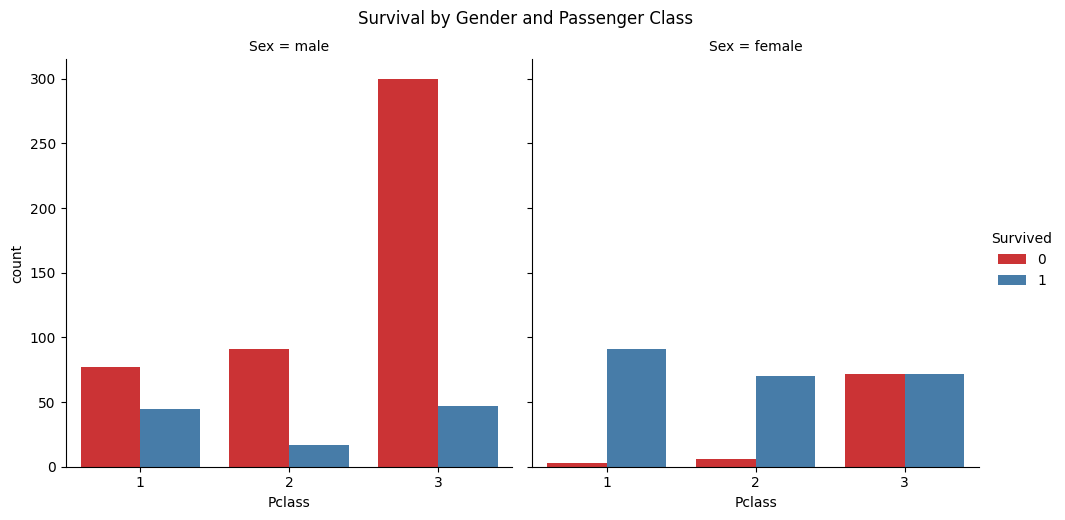

In [31]:
g = sns.catplot(x='Pclass', hue='Survived', col='Sex', data=df, kind='count', palette='Set1')
g.fig.suptitle('Survival by Gender and Passenger Class', y=1.03)
plt.show()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FamilySize       0
dtype: int64


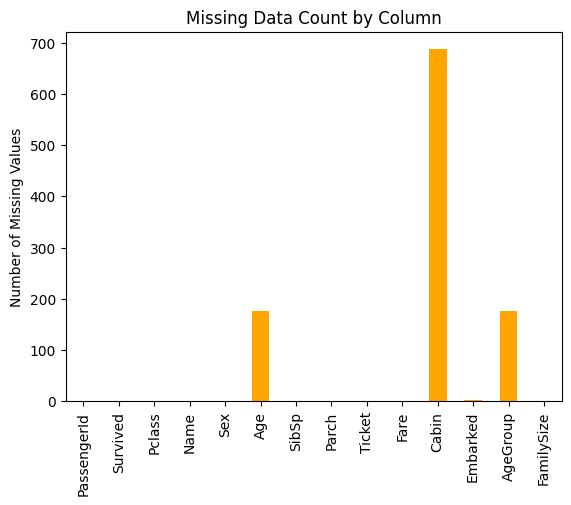

In [32]:
missing_data = df.isnull().sum()
print(missing_data)

missing_data.plot(kind='bar', color='orange')
plt.title('Missing Data Count by Column')
plt.ylabel('Number of Missing Values')
plt.show()
